In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasharjebraeily/drowsy-detection-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/yasharjebraeily/drowsy-detection-dataset/versions/1


In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau


In [ ]:
dataset_path = os.path.join(path, "Drowsy_datset")

train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")


In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)


class_weights = class_weight.compute_class_weight(
    class_weight={0: 1.0, 1: 0.7},
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))

print("Computed class weights:", class_weights)


Found 5859 images belonging to 2 classes.
Found 1483 images belonging to 2 classes.
Computed class weights: {0: np.float64(1.0), 1: np.float64(0.7)}


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 38s 190ms/step - accuracy: 0.5999 - loss: 0.8618 - val_accuracy: 0.4895 - val_loss: 1.1697 - learning_rate: 1.0000e-04
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 35s 192ms/step - accuracy: 0.7279 - loss: 0.6355 - val_accuracy: 0.5988 - val_loss: 0.9172 - learning_rate: 1.0000e-04
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 35s 188ms/step - accuracy: 0.7622 - loss: 0.5939 - val_accuracy: 0.8894 - val_loss: 0.5022 - learning_rate: 1.0000e-04
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 36s 193ms/step - accuracy: 0.7847 - loss: 0.5614 - val_accuracy: 0.9353 - val_loss: 0.4086 - learning_rate: 1.0000e-04
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.8067 - loss: 0.5309 - val_accuracy: 0.9353 - val_loss: 0.3959 - learning_rate: 1.0000e-04
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 36s 196ms/step - accuracy: 0.8188 - loss: 0.5071 - val_accuracy: 0.9481 - val_loss: 0.3647 - learning_rate: 1.0000e-04
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 34s 187ms/step - 

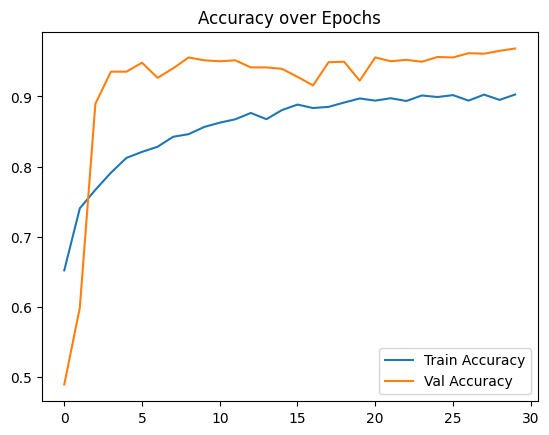

In [ ]:

model = Sequential([
    Conv2D(16, (3,3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(32, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=l2(0.0005)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=30,
    verbose=1,
    class_weight=class_weights,
    callbacks=[lr_scheduler]
)


model.save("drowsiness_model.h5")


plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.utils import class_weight
import numpy as np
import matplotlib.pyplot as plt


In [ ]:



train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=output)


model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15,
    class_weight=class_weights,
    callbacks=[lr_scheduler],
    verbose=1
)


model.save("mobilenetv2_drowsy_model.keras")
print("✅ MobileNetV2 model saved successfully!")


Found 5859 images belonging to 2 classes.
Found 1483 images belonging to 2 classes.
Class Weights: {0: np.float64(1.0428978284086863), 1: np.float64(0.9604918032786885)}


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 121s 617ms/step - accuracy: 0.6430 - loss: 0.6698 - val_accuracy: 0.9049 - val_loss: 0.2701 - learning_rate: 1.0000e-04
Epoch 2/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 105s 571ms/step - accuracy: 0.7998 - loss: 0.4184 - val_accuracy: 0.9508 - val_loss: 0.2013 - learning_rate: 1.0000e-04
Epoch 3/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 110s 595ms/step - accuracy: 0.8595 - loss: 0.3254 - val_accuracy: 0.9541 - val_loss: 0.1659 - learning_rate: 1.0000e-04
Epoch 4/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 106s 575ms/step - accuracy: 0.8685 - loss: 0.3033 - val_accuracy: 0.9474 - val_loss: 0.1578 - learning_rate: 1.0000e-04
Epoch 5/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 106s 576ms/step - accuracy: 0.8918 - loss: 0.2598 - val_accuracy: 0.9528 - val_loss: 0.1466 - learning_rate: 1.0000e-04
Epoch 6/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 116s 630ms/step - accuracy: 0.8981 - loss: 0.2443 - val_accuracy: 0.9501 - val_loss: 0.1376 - learning_rate: 1.0000e-04
Epoch 7/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 

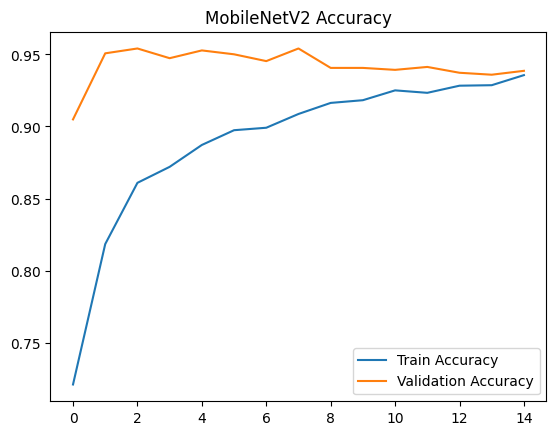

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Accuracy')
plt.legend()
plt.show()

In [ ]:
import kagglehub
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.utils import class_weight

In [ ]:
def force_rgb(x):
    if x.shape[-1] == 1:
        x = tf.image.grayscale_to_rgb(x)
    return x

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    preprocessing_function=force_rgb
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=force_rgb
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary'
)


class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)


base_model = EfficientNetB0(
    weights='imagenet', include_top=False, input_shape=(128, 128, 3)
)
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])


lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)

history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=15,
    class_weight=class_weights,
    callbacks=[lr_scheduler],
    verbose=1
)


model.save("efficientnet_drowsy_model.keras")
print("✅ Model saved as efficientnet_drowsy_model.keras")


Found 5859 images belonging to 2 classes.
Found 1483 images belonging to 2 classes.
Class Weights: {0: np.float64(1.0428978284086863), 1: np.float64(0.9604918032786885)}


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 192s 975ms/step - accuracy: 0.5012 - loss: 0.7004 - val_accuracy: 0.5105 - val_loss: 0.6952 - learning_rate: 1.0000e-04
Epoch 2/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 157s 855ms/step - accuracy: 0.5119 - loss: 0.6944 - val_accuracy: 0.4895 - val_loss: 0.6938 - learning_rate: 1.0000e-04
Epoch 3/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 158s 860ms/step - accuracy: 0.5124 - loss: 0.6940 - val_accuracy: 0.5105 - val_loss: 0.6950 - learning_rate: 1.0000e-04
Epoch 4/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 156s 848ms/step - accuracy: 0.4796 - loss: 0.6973 - val_accuracy: 0.5105 - val_loss: 0.6930 - learning_rate: 1.0000e-04
Epoch 5/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 156s 846ms/step - accuracy: 0.5029 - loss: 0.6948 - val_accuracy: 0.4895 - val_loss: 0.6947 - learning_rate: 1.0000e-04
Epoch 6/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 155s 841ms/step - accuracy: 0.4964 - loss: 0.6948 - val_accuracy: 0.4895 - val_loss: 0.6935 - learning_rate: 1.0000e-04
Epoch 7/15
184/184 ━━━━━━━━━━━━━━━━━━━━ 

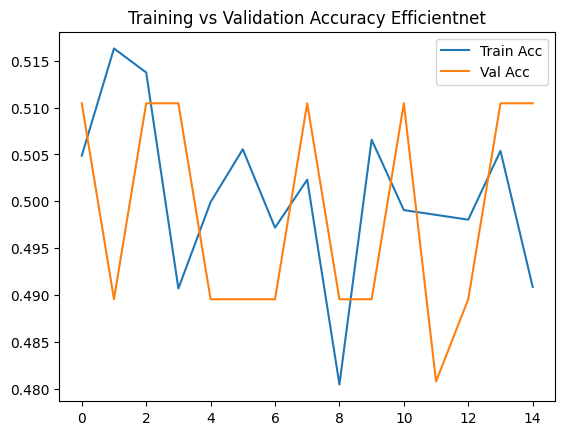

In [ ]:

# Plot accuracy

plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training vs Validation Accuracy Efficientnet")
plt.show()


🚀 Evaluating CNN (Conv2D) (Input 64x64)
Found 1483 images belonging to 2 classes.

📊 CNN (Conv2D) Metrics
----------------------------------------
Accuracy : 0.9683
Precision: 0.9657
Recall   : 0.9697
F1-score : 0.9677
ROC-AUC  : 0.9935

Classification Report:
              precision    recall  f1-score   support

      Drowsy       0.97      0.97      0.97       757
       Alert       0.97      0.97      0.97       726

    accuracy                           0.97      1483
   macro avg       0.97      0.97      0.97      1483
weighted avg       0.97      0.97      0.97      1483



<Figure size 800x600 with 0 Axes>

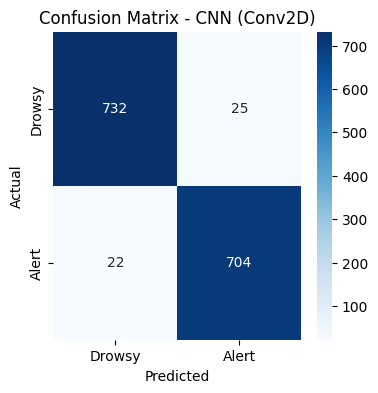


🚀 Evaluating MobileNetV2 (Input 128x128)
Found 1483 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



📊 MobileNetV2 Metrics
----------------------------------------
Accuracy : 0.9386
Precision: 0.9296
Recall   : 0.9463
F1-score : 0.9379
ROC-AUC  : 0.9898

Classification Report:
              precision    recall  f1-score   support

      Drowsy       0.95      0.93      0.94       757
       Alert       0.93      0.95      0.94       726

    accuracy                           0.94      1483
   macro avg       0.94      0.94      0.94      1483
weighted avg       0.94      0.94      0.94      1483



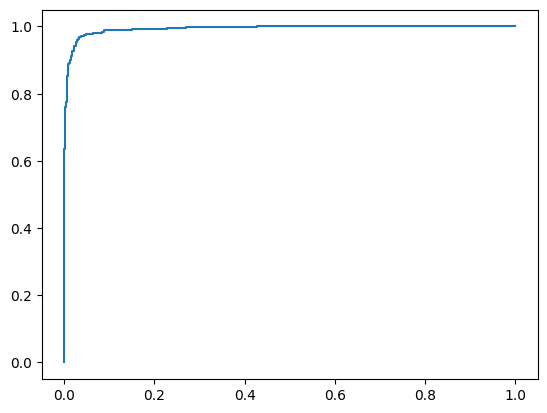

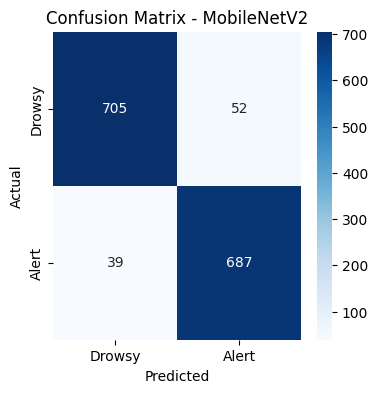


🚀 Evaluating EfficientNetB0 (Input 128x128)
Found 1483 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



📊 EfficientNetB0 Metrics
----------------------------------------
Accuracy : 0.5105
Precision: 0.0000
Recall   : 0.0000
F1-score : 0.0000
ROC-AUC  : 0.3382

Classification Report:
              precision    recall  f1-score   support

      Drowsy       0.51      1.00      0.68       757
       Alert       0.00      0.00      0.00       726

    accuracy                           0.51      1483
   macro avg       0.26      0.50      0.34      1483
weighted avg       0.26      0.51      0.35      1483



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

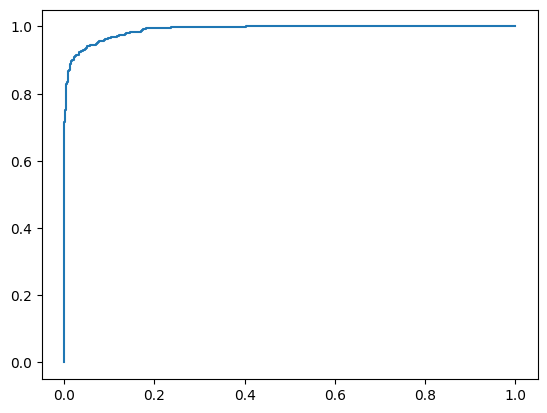

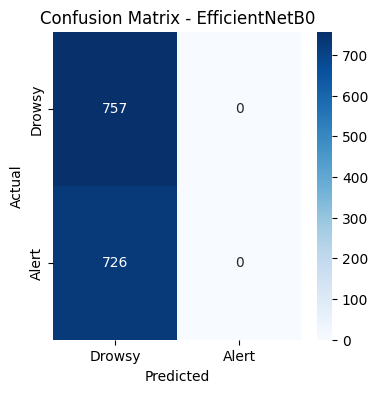

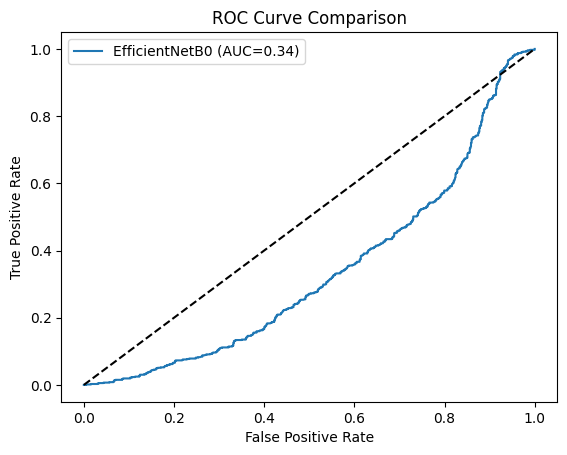


✅ FINAL COMPARISON TABLE


,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,CNN (Conv2D),0.968307,0.965706,0.969697,0.967698,0.993470
1,MobileNetV2,0.938638,0.929635,0.946281,0.937884,0.989787
2,EfficientNetB0,0.510452,0.000000,0.000000,0.000000,0.338162


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


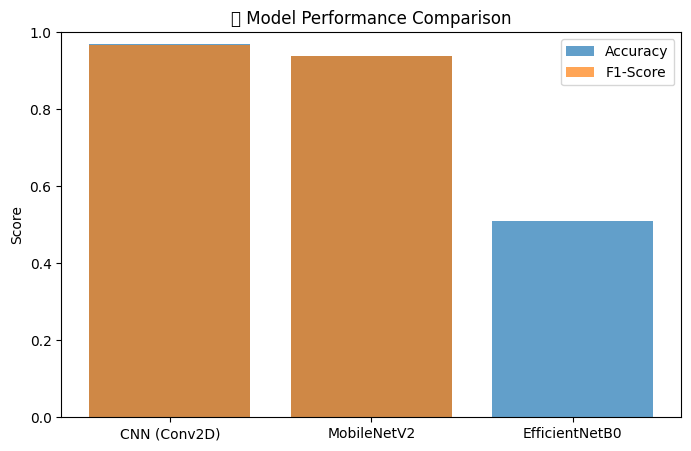

In [ ]:


import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import seaborn as sns
import pandas as pd

test_root = os.path.join(path, "Drowsy_datset", "test")


models_info = {
    "CNN (Conv2D)": {
        "path": "drowsiness_model.h5",
        "img_size": 64
    },
    "MobileNetV2": {
        "path": "mobilenetv2_drowsy_model.keras",
        "img_size": 128
    },
    "EfficientNetB0": {
        "path": "efficientnet_drowsy_model.keras",
        "img_size": 128
    }
}


def evaluate_model(model, test_data, name):
    y_true = test_data.classes
    y_pred_prob = model.predict(test_data, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred_prob)

    print(f"\n📊 {name} Metrics")
    print("-" * 40)
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1-score : {f1:.4f}")
    print(f"ROC-AUC  : {auc:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=['Drowsy', 'Alert']))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Drowsy', 'Alert'], yticklabels=['Drowsy', 'Alert'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

    return {"Model": name, "Accuracy": acc, "Precision": prec,
            "Recall": rec, "F1": f1, "ROC-AUC": auc}


results = []
plt.figure(figsize=(8, 6))

for name, info in models_info.items():
    img_size = info["img_size"]
    model_path = info["path"]

    print(f"\n🚀 Evaluating {name} (Input {img_size}x{img_size})")
    model = load_model(model_path)

    # Create test generator for correct input size
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_data = test_datagen.flow_from_directory(
        test_root,
        target_size=(img_size, img_size),
        color_mode='rgb',
        batch_size=32,
        class_mode='binary',
        shuffle=False
    )

    results.append(evaluate_model(model, test_data, name))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


df = pd.DataFrame(results)
print("\n✅ FINAL COMPARISON TABLE")
display(df.sort_values(by='Accuracy', ascending=False))

plt.figure(figsize=(8, 5))
plt.bar(df['Model'], df['Accuracy'], label='Accuracy', alpha=0.7)
plt.bar(df['Model'], df['F1'], label='F1-Score', alpha=0.7)
plt.ylim(0, 1)
plt.ylabel('Score')
plt.title('📊 Model Performance Comparison')
plt.legend()
plt.show()
